# Project 2

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import yfinance as yahooFinance
from backtesting.test import SMA
import plotly.graph_objs as go
from finta import TA
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn import svm
from sklearn.metrics import classification_report

C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
GetFacebookInformation = yahooFinance.Ticker("META")
df_tbl=pd.DataFrame(data=GetFacebookInformation.history(period="max"))
df=df_tbl.copy()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0


In [3]:
# Drop all NaN values from the DataFrame
df = df.dropna()

# Review the DataFrame
display(df.head())
display(df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0


In [4]:
df['Actual Returns']=df['Close'].pct_change()

In [5]:
bb_sma_df=TA.BBANDS(df)

In [6]:
# Concatenate the Bollinger Bands to the DataFrame
bb_sma_dt = pd.concat([df, bb_sma_df], axis=1)

# Review the DataFrame
bb_sma_dt.iloc[17:25, :]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,,,
2012-06-13 00:00:00-04:00,27.660000,28.100000,27.100000,27.270000,17102800,0.0,0.0,-0.004744,NaN,NaN,NaN
2012-06-14 00:00:00-04:00,27.650000,28.320000,27.379999,28.290001,16855000,0.0,0.0,0.037404,NaN,NaN,NaN
2012-06-15 00:00:00-04:00,28.510000,30.100000,28.350000,30.010000,43563800,0.0,0.0,0.060799,35.682916,29.376,23.069084
2012-06-18 00:00:00-04:00,29.959999,32.080002,29.410000,31.410000,42978900,0.0,0.0,0.046651,33.898611,29.035,24.171389
2012-06-19 00:00:00-04:00,31.540001,32.180000,30.700001,31.910000,30849000,0.0,0.0,0.015918,33.411733,28.929,24.446267
2012-06-20 00:00:00-04:00,31.920000,31.930000,31.150000,31.600000,15553600,0.0,0.0,-0.009715,33.507637,28.959,24.410363
2012-06-21 00:00:00-04:00,31.670000,32.500000,31.510000,31.840000,21875300,0.0,0.0,0.007595,33.477627,28.951,24.424373
2012-06-22 00:00:00-04:00,32.410000,33.450001,32.060001,33.049999,74834000,0.0,0.0,0.038002,33.482428,28.952,24.421572


In [7]:
# Visualize close price for the investment
security_close = bb_sma_dt[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_upper = bb_sma_dt[["BB_UPPER"]].hvplot(
    line_color="purple",
    ylabel="Price in $",
    width=1000,
    height=400
)


bb_middle = bb_sma_dt[["BB_MIDDLE"]].hvplot(
    line_color="orange",
    ylabel="Price in $",
    width=1000,
    height=400
)

bb_lower = bb_sma_dt[["BB_LOWER"]].hvplot(
    line_color="blue",
    ylabel="Price in $",
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower
bbands_plot

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

When the price moves close to the upper band (UB), it may indicate overbought conditions, suggesting a potential price reversal to the downside.
Conversely, when the price approaches the lower band (LB), it may indicate oversold conditions, suggesting a potential price reversal to the upside.
The middle band (MA) represents the average price over the specified period and can serve as a reference point.
Traders often look for price crossovers of the bands or significant price deviations from the bands as potential trading signals.

In [8]:
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 20
    n2 = 40
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [9]:
    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    # Ugh!
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()

In [10]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(df, SmaCross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 100, 10),
    n2=range(10, 250, 10),
    constraint=lambda p: p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=1,
    return_heatmap=True)

  0%|          | 0/13 [00:00<?, ?it/s]

CPU times: total: 11.5 s
Wall time: 29.2 s


In [11]:
from backtesting import Backtest

bt = Backtest(df, SmaCross, cash=100_000, commission=.002)
stats = bt.run()
stats

Start                     2012-05-18 00:00...
End                       2023-12-15 00:00...
Duration                   4228 days 01:00:00
Exposure Time [%]                   98.284146
Equity Final [$]               2014794.758457
Equity Peak [$]                2153748.735263
Return [%]                        1914.794758
Buy & Hold Return [%]              776.065962
Return (Ann.) [%]                   29.654819
Volatility (Ann.) [%]               48.839295
Sharpe Ratio                         0.607192
Sortino Ratio                        1.346598
Calmar Ratio                         0.687313
Max. Drawdown [%]                  -43.146006
Avg. Drawdown [%]                   -5.369836
Max. Drawdown Duration      559 days 00:00:00
Avg. Drawdown Duration       33 days 00:00:00
# Trades                                   64
Win Rate [%]                          48.4375
Best Trade [%]                     149.786618
Worst Trade [%]                    -18.837636
Avg. Trade [%]                    

In [12]:
heatmap

n1  n2 
10  20      22665.954104
    30      73593.442969
    40      29320.563139
    50      48266.839152
    60      76292.422894
               ...      
90  200     38911.460499
    210    104106.402326
    220     20430.584479
    230     21743.593364
    240     16754.909776
Name: Equity Final [$], Length: 171, dtype: float64

In [13]:
heatmap.sort_values().iloc[-3:]

n1  n2
20  30    115219.068108
10  70    131373.152852
20  40    200972.152625
Name: Equity Final [$], dtype: float64

In [14]:
last_row=pd.DataFrame(data=heatmap.sort_values().iloc[-1:]).reset_index()
n1=last_row.iloc[0,0]
n2=last_row.iloc[0,1]
display(n1,n2)

20

40

In [15]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,20,30,40,50,60,70,80,90,100,110,...,150,160,170,180,190,200,210,220,230,240
n1,,,,,,,,,,,,,,,,,,,,,
10,22665.954104,73593.442969,29320.563139,48266.839152,76292.422894,131373.152852,79702.645477,112962.747716,76784.436254,77467.512484,...,40617.549333,59100.386410,47509.507841,46196.885877,49976.258735,79419.250075,101359.510999,94679.097223,103940.881982,108250.381571
20,NaN,115219.068108,200972.152625,57127.163818,48732.552413,53813.631903,54783.055915,39928.131423,46828.464682,49500.339403,...,32665.003451,23318.130583,24300.236580,28368.880710,36256.807237,45221.092042,36677.361427,41321.272316,81021.472295,87753.430635
30,NaN,NaN,21999.913703,74141.374482,25826.025245,29910.033110,35315.981522,28561.429273,17037.814719,21632.959410,...,6103.971055,7711.666232,9762.047599,15324.410495,11044.238686,30595.608928,28698.201535,30586.609286,30016.070770,30220.514902
40,NaN,NaN,NaN,26714.142333,9534.213164,9881.876234,15614.365474,11643.115928,9435.054863,9640.349214,...,8744.330318,10988.692761,12074.322296,12959.437109,13341.998206,18409.121057,23960.594300,23343.649072,26392.587676,33380.524693
50,NaN,NaN,NaN,NaN,3199.960994,7387.802352,5424.963336,7009.691917,6366.653975,7033.938600,...,9051.910042,11356.660353,18089.020352,18343.079868,20270.362650,18055.713999,24702.983065,30377.092004,32207.907069,39545.134363
60,NaN,NaN,NaN,NaN,NaN,4294.773371,1795.789325,6024.573808,5102.349731,6646.201859,...,8982.391010,11377.290490,19036.857604,25404.314741,20731.343031,25367.903438,34258.275690,29376.949383,11788.604304,8810.763408
70,NaN,NaN,NaN,NaN,NaN,NaN,3226.922261,6002.288478,5066.267391,10380.240125,...,16314.078153,20742.311238,13625.697881,30895.537095,24687.006951,23322.712205,31381.453772,10060.197752,10052.916120,13315.350318
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15574.454888,11543.519208,7065.114410,...,10774.550682,12010.706545,18448.007246,30003.239247,29266.255631,23951.487428,47150.139049,14012.061310,19648.740033,12691.246148
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7797.111841,6668.265519,...,14739.428306,20056.078611,22262.386072,27597.372782,44267.660414,38911.460499,104106.402326,20430.584479,21743.593364,16754.909776


<Axes: xlabel='n2', ylabel='n1'>

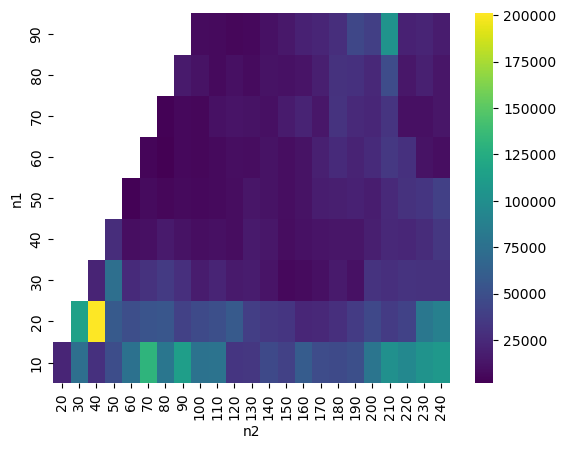

In [16]:
%matplotlib inline

import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

In [17]:
%%time

stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats

  0%|          | 0/13 [00:00<?, ?it/s]

CPU times: total: 4.91 s
Wall time: 9.73 s


Start                     2012-05-18 00:00...
End                       2023-12-15 00:00...
Duration                   4228 days 01:00:00
Exposure Time [%]                   98.284146
Equity Final [$]               2014794.758457
Equity Peak [$]                2153748.735263
Return [%]                        1914.794758
Buy & Hold Return [%]              776.065962
Return (Ann.) [%]                   29.654819
Volatility (Ann.) [%]               48.839295
Sharpe Ratio                         0.607192
Sortino Ratio                        1.346598
Calmar Ratio                         0.687313
Max. Drawdown [%]                  -43.146006
Avg. Drawdown [%]                   -5.369836
Max. Drawdown Duration      559 days 00:00:00
Avg. Drawdown Duration       33 days 00:00:00
# Trades                                   64
Win Rate [%]                          48.4375
Best Trade [%]                     149.786618
Worst Trade [%]                    -18.837636
Avg. Trade [%]                    

In [18]:
stats._strategy

<Strategy SmaCross(n1=20,n2=40)>

In [19]:
bt.plot(plot_volume=False, plot_pl=False)

C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\ctzsn\Anaconda3\envs\dev\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p1344', ...)

In [20]:
# Set the short window and long window
short_window = n1
long_window = n2

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
df['SMA_Fast'] = df['Close'].rolling(window=short_window).mean()
df['SMA_Slow'] = df['Close'].rolling(window=long_window).mean()

# Review the DataFrame
display(df.head())
display(df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.109861,NaN,NaN
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.089039,NaN,NaN
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.032258,NaN,NaN
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.032187,NaN,NaN


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,-0.022449,331.117502,321.551750
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,0.027484,331.369002,321.878500
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,0.001556,331.290501,322.147000
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0,-0.004690,331.313503,322.552000
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0,0.005253,331.350003,323.104751


In [21]:
# Initialize the new Signal column
df['Signal'] = 0.0

# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
# Generate the trading signal 0 or 1,
# where 1 is when short-window (SMA50) is greater than the long (SMA 100)
# and 0 otherwise
df['Signal'][short_window:] = np.where(
    df['SMA_Fast'][short_window:] > df['SMA_Slow'][short_window:], 1.0, 0.0
)

# Review the DataFrame
display(df.head())
display(df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_25892\3145976102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][short_window:] = np.where(


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,NaN,NaN,NaN,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.109861,NaN,NaN,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.089039,NaN,NaN,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.032258,NaN,NaN,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.032187,NaN,NaN,0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,-0.022449,331.117502,321.551750,1.0
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,0.027484,331.369002,321.878500,1.0
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,0.001556,331.290501,322.147000,1.0
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0,-0.004690,331.313503,322.552000,1.0
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0,0.005253,331.350003,323.104751,1.0


In [22]:
# Calculate the points in time when the Signal value changes
# Identify trade entry (1) and exit (-1) points
df['Entry/Exit'] = df['Signal'].diff()

# Review the DataFrame
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit
2023-12-04 00:00:00-05:00,317.290009,320.859985,313.660004,320.019989,19037100,0.0,0.0,-0.014777,330.285500,321.214500,1.0,0.0
2023-12-05 00:00:00-05:00,318.980011,321.880005,315.390015,318.290009,16952100,0.0,0.0,-0.005406,330.410001,321.212750,1.0,0.0
2023-12-06 00:00:00-05:00,321.929993,322.250000,317.040009,317.450012,11294300,0.0,0.0,-0.002639,330.341501,321.103001,1.0,0.0
2023-12-07 00:00:00-05:00,317.769989,328.239990,317.769989,326.589996,15905100,0.0,0.0,0.028792,330.682001,321.072250,1.0,0.0
2023-12-08 00:00:00-05:00,323.089996,333.170013,323.000000,332.750000,14077500,0.0,0.0,0.018862,331.292001,321.287000,1.0,0.0
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,-0.022449,331.117502,321.551750,1.0,0.0
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,0.027484,331.369002,321.878500,1.0,0.0
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,0.001556,331.290501,322.147000,1.0,0.0
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0,-0.004690,331.313503,322.552000,1.0,0.0
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0,0.005253,331.350003,323.104751,1.0,0.0


In [23]:
# Visualize exit position relative to close price
exit = df[df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='green',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = df[df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = df[['SMA_Fast', 'SMA_Slow']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit

# Show the plot with a title
entry_exit_plot.opts(
    title="META - SMA - Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [24]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

In [25]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
df['Position'] = share_size * df['Signal']

In [26]:
# Determine the points in time where a 500 share position is bought or sold
df['Entry/Exit Position'] = df['Position'].diff()

In [27]:
# Multiply the close price by the number of shares held, or the Position
df['Portfolio Holdings'] = df['Close'] * df['Position']

In [28]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
df['Portfolio Cash'] = initial_capital - (df['Close'] * df['Entry/Exit Position']).cumsum() 

In [29]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
df['Portfolio Total'] = df['Portfolio Cash'] + df['Portfolio Holdings']

In [30]:
# Calculate the portfolio daily returns
df['Portfolio Daily Returns'] = df['Portfolio Total'].pct_change()

In [31]:
# Calculate the portfolio cumulative returns
df['Portfolio Cumulative Returns'] = (1 + df['Portfolio Daily Returns']).cumprod() - 1

In [32]:
# Print the DataFrame
df.head(150)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.109861,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,NaN,NaN
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.089039,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.00000
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.032258,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.00000
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.032187,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 00:00:00-05:00,26.770000,27.000000,26.320000,26.750000,57742500,0.0,0.0,-0.002238,26.4990,23.70300,1.0,0.0,500.0,0.0,13375.000000,86065.000534,99440.000534,-0.000302,-0.00560
2012-12-18 00:00:00-05:00,26.959999,27.910000,26.900000,27.709999,60512900,0.0,0.0,0.035888,26.7385,23.92125,1.0,0.0,500.0,0.0,13854.999542,86065.000534,99920.000076,0.004827,-0.00080
2012-12-19 00:00:00-05:00,27.830000,28.219999,26.950001,27.410000,61390300,0.0,0.0,-0.010826,26.9540,24.13150,1.0,0.0,500.0,0.0,13704.999924,86065.000534,99770.000458,-0.001501,-0.00230
2012-12-20 00:00:00-05:00,27.490000,27.600000,27.129999,27.360001,35574800,0.0,0.0,-0.001824,27.1060,24.33250,1.0,0.0,500.0,0.0,13680.000305,86065.000534,99745.000839,-0.000251,-0.00255


In [33]:
# Visualize exit position relative to total portfolio value
exit = df[df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    marker='v',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize entry position relative to total portfolio value
entry = df[df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='purple',
    marker='^',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
total_portfolio_value = df[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    xlabel='Date',
    width=1000,
    height=400
)

# Overlay the plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(
    title="META Algorithm - Total Portfolio Value",
    yformatter='%.0f'
)

:Overlay
   .Curve.I                    :Curve   [index]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [index]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [index]   (Portfolio Total)

In [34]:
# Create the list of the metric names
sma_metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['SMA_Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
sma_portfolio_evaluation_df = pd.DataFrame(index=sma_metrics, columns=columns)

# Review the DataFrame
sma_portfolio_evaluation_df

,SMA_Backtest
Annualized Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [35]:
# Calculate the Annualized return metric
sma_portfolio_evaluation_df.loc['Annualized Return'] = (
    df['Portfolio Daily Returns'].mean() * 252
)

In [36]:
# Calculate the Annual volatility metric
sma_portfolio_evaluation_df.loc['Annual Volatility'] = (
    df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [37]:
# Calculate the Sharpe ratio
sma_portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    df['Portfolio Daily Returns'].mean() * 252) / (
    df['Portfolio Daily Returns'].std() * np.sqrt(252)
)

In [38]:
# Calculate the Cumulative returns metric
sma_portfolio_evaluation_df.loc['Cumulative Returns'] = df['Portfolio Cumulative Returns'][-1]

In [39]:
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
sma_portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio


In [40]:
# Review the portfolio evaluation DataFrame
sma_portfolio_evaluation_df

,SMA_Backtest
Annualized Return,0.104472
Cumulative Returns,2.0606
Annual Volatility,0.123694
Sharpe Ratio,0.8446
Sortino Ratio,1.266392


## Using EMA - Exponential Moving Average

Fitting with EMA Strategy allows us to give more weight to data that is more current, unlike SMA which is equal wight across the period of time. Hence more reliant on recent data points.

In [41]:
# Create a DataFrame with the index and Close column from the dataset
ema_signals_df = df_tbl.loc[:, ["Close"]].copy()

# Set the short window and long windows
short_window = n1
long_window = n2

# Generate the short and long moving averages (50 and 100 days, respectively)
ema_signals_df["EMA_Fast"] = df_tbl["Close"].ewm(span=short_window).mean()
ema_signals_df["EMA_Slow"] = df_tbl["Close"].ewm(span=long_window).mean()

# Review the DataFrame
ema_signals_df.head()

,Close,EMA_Fast,EMA_Slow
Date,,,
2012-05-18 00:00:00-04:00,38.230000,38.230000,38.230000
2012-05-21 00:00:00-04:00,34.029999,36.024999,36.077499
2012-05-22 00:00:00-04:00,31.000000,34.179850,34.299687
2012-05-23 00:00:00-04:00,32.000000,33.550561,33.680946
2012-05-24 00:00:00-04:00,33.029999,33.424641,33.537421


In [42]:
# Set the Signal column
ema_signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the EMA50 is greater than (or crosses over) the EMA100
# where 0 is when the EMA50 is under the EMA100
ema_signals_df["Signal"][short_window:] = np.where(
    ema_signals_df["EMA_Fast"][short_window:] > ema_signals_df["EMA_Slow"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
ema_signals_df["Entry/Exit"] = ema_signals_df["Signal"].diff()

# Review the DataFrame
ema_signals_df.head()

,Close,EMA_Fast,EMA_Slow,Signal,Entry/Exit
Date,,,,,
2012-05-18 00:00:00-04:00,38.230000,38.230000,38.230000,0.0,NaN
2012-05-21 00:00:00-04:00,34.029999,36.024999,36.077499,0.0,0.0
2012-05-22 00:00:00-04:00,31.000000,34.179850,34.299687,0.0,0.0
2012-05-23 00:00:00-04:00,32.000000,33.550561,33.680946,0.0,0.0
2012-05-24 00:00:00-04:00,33.029999,33.424641,33.537421,0.0,0.0


In [43]:
# Visualize entry position relative to close price
entry = ema_signals_df[ema_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = ema_signals_df[ema_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='green',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = ema_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = ema_signals_df[["EMA_Fast", "EMA_Slow"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot


# Show the plot with a title
entry_exit_plot.opts(
    title="META - EMA - Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [44]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
ema_signals_df['Position'] = share_size * ema_signals_df['Signal']
ema_signals_df['Entry/Exit Position'] = ema_signals_df['Position'].diff()
# Multiply the close price by the number of shares held, or the Position
ema_signals_df['Portfolio Holdings'] = ema_signals_df['Close'] * ema_signals_df['Position']
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
ema_signals_df['Portfolio Cash'] = initial_capital - (ema_signals_df['Close'] * ema_signals_df['Entry/Exit Position']).cumsum()
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
ema_signals_df['Portfolio Total'] = ema_signals_df['Portfolio Cash'] + ema_signals_df['Portfolio Holdings'] 
# Calculate the portfolio daily returns
ema_signals_df['Portfolio Daily Returns'] = ema_signals_df['Portfolio Total'].pct_change()
# Calculate the portfolio cumulative returns
ema_signals_df['Portfolio Cumulative Returns'] = (1 + ema_signals_df['Portfolio Daily Returns']).cumprod() - 1


In [45]:
ema_metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['EMA_Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
ema_portfolio_evaluation_df = pd.DataFrame(index=ema_metrics, columns=columns)

# Calculate the Annualized return metric
ema_portfolio_evaluation_df.loc['Annualized Return'] = (
    ema_signals_df['Portfolio Daily Returns'].mean() * 252
)

# Calculate the Annual volatility metric
ema_portfolio_evaluation_df.loc['Annual Volatility'] = (
    ema_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Sharpe ratio
ema_portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    ema_signals_df['Portfolio Daily Returns'].mean() * 252) / (
    ema_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Cumulative returns metric
ema_portfolio_evaluation_df.loc['Cumulative Returns'] = ema_signals_df['Portfolio Cumulative Returns'][-1]
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = ema_signals_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
ema_portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
ema_portfolio_evaluation_df

,EMA_Backtest
Annualized Return,0.104716
Cumulative Returns,2.03245
Annual Volatility,0.131655
Sharpe Ratio,0.795385
Sortino Ratio,1.166971


## Using SMMA - Smoothed Simple Moving Average

A Smoothed Moving Average is an Exponential Moving Average, only with a longer period applied. The Smoothed Moving Average gives the recent prices an equal weighting to the historic ones. The calculation does not refer to a fixed period, but rather takes all available data series into account.
The Smoothed Moving Average uses a longer period to determine the average, assigning a weight to the price data as the average is calculated. Thus, the oldest price data in the Smoothed Moving Average are never removed, but they have only a minimal impact on the Moving Average.

In [46]:
df_tbl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0


In [47]:
# Add the SMMA technical indicators for the short and long windows
smma_signals_df = df_tbl.copy()

short_window = n1
long_window = n2

smma_signals_df["SMMA_Fast"] = TA.SMMA(smma_signals_df, short_window)
smma_signals_df["SMMA_Slow"] = TA.SMMA(smma_signals_df, long_window)

# Review the DataFrame
smma_signals_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMMA_Fast,SMMA_Slow
Date,,,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,38.230000,38.230000
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,36.076153,36.103417
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,34.296608,34.359032
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,33.677555,33.746691
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,33.534429,33.596004


In [48]:
# Set the Signal column
smma_signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
smma_signals_df["Signal"][short_window:] = np.where(
    smma_signals_df["SMMA_Fast"][short_window:] > smma_signals_df["SMMA_Slow"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
smma_signals_df["Entry/Exit"] = smma_signals_df["Signal"].diff()

# Review the DataFrame
smma_signals_df.tail()

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_25892\3058037095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smma_signals_df["Signal"][short_window:] = np.where(


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMMA_Fast,SMMA_Slow,Signal,Entry/Exit
Date,,,,,,,,,,,
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,322.759518,312.918044,1.0,0.0
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,323.332542,313.450593,1.0,0.0
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,323.902914,313.982828,1.0,0.0
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0,324.366269,314.462507,1.0,0.0
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0,324.893956,314.973945,1.0,0.0


In [49]:
# Visualize entry position relative to close price
entry = smma_signals_df[smma_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = smma_signals_df[smma_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="green",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = smma_signals_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = smma_signals_df[["SMMA_Fast", "SMMA_Slow"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot


# Show the plot with a title
entry_exit_plot.opts(
    title="META - SMMA - Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [50]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
smma_signals_df['Position'] = share_size * smma_signals_df['Signal']
smma_signals_df['Entry/Exit Position'] = smma_signals_df['Position'].diff()
# Multiply the close price by the number of shares held, or the Position
smma_signals_df['Portfolio Holdings'] = smma_signals_df['Close'] * smma_signals_df['Position']
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
smma_signals_df['Portfolio Cash'] = initial_capital - (smma_signals_df['Close'] * smma_signals_df['Entry/Exit Position']).cumsum()
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
smma_signals_df['Portfolio Total'] = smma_signals_df['Portfolio Cash'] + smma_signals_df['Portfolio Holdings'] 
# Calculate the portfolio daily returns
smma_signals_df['Portfolio Daily Returns'] = smma_signals_df['Portfolio Total'].pct_change()
# Calculate the portfolio cumulative returns
smma_signals_df['Portfolio Cumulative Returns'] = (1 + smma_signals_df['Portfolio Daily Returns']).cumprod() - 1


In [51]:
smma_metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['SMMA_Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
smma_portfolio_evaluation_df = pd.DataFrame(index=smma_metrics, columns=columns)

# Calculate the Annualized return metric
smma_portfolio_evaluation_df.loc['Annualized Return'] = (
    smma_signals_df['Portfolio Daily Returns'].mean() * 252
)

# Calculate the Annual volatility metric
smma_portfolio_evaluation_df.loc['Annual Volatility'] = (
    smma_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Sharpe ratio
smma_portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    smma_signals_df['Portfolio Daily Returns'].mean() * 252) / (
    smma_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Cumulative returns metric
smma_portfolio_evaluation_df.loc['Cumulative Returns'] = smma_signals_df['Portfolio Cumulative Returns'][-1]
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = smma_signals_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
smma_portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
smma_portfolio_evaluation_df

,SMMA_Backtest
Annualized Return,0.099751
Cumulative Returns,1.81355
Annual Volatility,0.142876
Sharpe Ratio,0.698169
Sortino Ratio,1.022957


## Using Volume-Adjuted Moving Average

A Volume Weighted Moving Average is a moving average where more weight is given to bars with heavy volume than with light volume.

In [52]:
# Create a DataFrame with the index and Close column from the dataset
vama_signals_df = df_tbl.copy()

# Set the short window and long windows
short_window = n1
long_window = n2

# Generate the short and long moving averages (50 and 100 days, respectively)
vama_signals_df["VAMA_Fast"] = TA.VAMA(vama_signals_df, short_window)
vama_signals_df["VAMA_Slow"] = TA.VAMA(vama_signals_df, long_window)

# Review the DataFrame
vama_signals_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,VAMA_Fast,VAMA_Slow
Date,,,,,,,,,
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,329.835918,317.992552
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,330.147588,318.365953
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,330.150941,318.634104
2023-12-14 00:00:00-05:00,333.850006,334.700012,328.640015,333.170013,19607300,0.0,0.0,330.259184,319.090524
2023-12-15 00:00:00-05:00,331.989990,338.660004,331.220001,334.920013,30001600,0.0,0.0,330.519131,319.923665


In [53]:
# Set the Signal column
vama_signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
vama_signals_df["Signal"][short_window:] = np.where(
    vama_signals_df["VAMA_Fast"][short_window:] > vama_signals_df["VAMA_Slow"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
vama_signals_df["Entry/Exit"] = vama_signals_df["Signal"].diff()

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_25892\3211367365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vama_signals_df["Signal"][short_window:] = np.where(


In [54]:
# Visualize entry position relative to close price
entry = vama_signals_df[vama_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color="purple",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = vama_signals_df[vama_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color="green",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = vama_signals_df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = vama_signals_df[["VAMA_Fast", "VAMA_Slow"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

# Show the plot with a title
entry_exit_plot.opts(
    title="META - VAMA - Entry and Exit Points"
)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [55]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1
# Otherwise, `Position` should be zero (sell)
vama_signals_df['Position'] = share_size * vama_signals_df['Signal']
vama_signals_df['Entry/Exit Position'] = vama_signals_df['Position'].diff()
# Multiply the close price by the number of shares held, or the Position
vama_signals_df['Portfolio Holdings'] = vama_signals_df['Close'] * vama_signals_df['Position']
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
vama_signals_df['Portfolio Cash'] = initial_capital - (vama_signals_df['Close'] * vama_signals_df['Entry/Exit Position']).cumsum()
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
vama_signals_df['Portfolio Total'] = vama_signals_df['Portfolio Cash'] + vama_signals_df['Portfolio Holdings'] 
# Calculate the portfolio daily returns
vama_signals_df['Portfolio Daily Returns'] = vama_signals_df['Portfolio Total'].pct_change()
# Calculate the portfolio cumulative returns
vama_signals_df['Portfolio Cumulative Returns'] = (1 + vama_signals_df['Portfolio Daily Returns']).cumprod() - 1


In [56]:
vama_metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['VAMA_Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
vama_portfolio_evaluation_df = pd.DataFrame(index=vama_metrics, columns=columns)

# Calculate the Annualized return metric
vama_portfolio_evaluation_df.loc['Annualized Return'] = (
    vama_signals_df['Portfolio Daily Returns'].mean() * 252
)

# Calculate the Annual volatility metric
vama_portfolio_evaluation_df.loc['Annual Volatility'] = (
    vama_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Sharpe ratio
vama_portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    vama_signals_df['Portfolio Daily Returns'].mean() * 252) / (
    vama_signals_df['Portfolio Daily Returns'].std() * np.sqrt(252)
)
# Calculate the Cumulative returns metric
vama_portfolio_evaluation_df.loc['Cumulative Returns'] = vama_signals_df['Portfolio Cumulative Returns'][-1]
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = vama_signals_df[['Portfolio Daily Returns']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Portfolio Daily Returns'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
vama_portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
vama_portfolio_evaluation_df

,VAMA_Backtest
Annualized Return,0.099387
Cumulative Returns,1.86685
Annual Volatility,0.128315
Sharpe Ratio,0.774549
Sortino Ratio,1.162189


In [57]:
portfolio_evaluation_df=pd.concat([sma_portfolio_evaluation_df,ema_portfolio_evaluation_df,smma_portfolio_evaluation_df,vama_portfolio_evaluation_df],axis=1)
portfolio_evaluation_df

,SMA_Backtest,EMA_Backtest,SMMA_Backtest,VAMA_Backtest
Annualized Return,0.104472,0.104716,0.099751,0.099387
Cumulative Returns,2.0606,2.03245,1.81355,1.86685
Annual Volatility,0.123694,0.131655,0.142876,0.128315
Sharpe Ratio,0.8446,0.795385,0.698169,0.774549
Sortino Ratio,1.266392,1.166971,1.022957,1.162189


A higher Sharpe Ratio indicates a better risk-adjusted performance. It means that, on average, the portfolio is generating more return for the amount of risk taken. 
A Sharpe Ratio greater than 1 or greater is generally considered good, hence the best trading strategy would be using the SMA algorithm based on the backtest performance metrics.
To provide a mroe refined assessment, Sortino Ratio could serve as a good indicator on risk-adjusted performance for investors who prioritise downside protection. Out of the performance metrics, SMA model once gain provide a more promising result.
On the other hand, SMA has the highest cumulative returns and lowest annual volatility, further indicating SMMA model works best.

In [58]:
df_compare=pd.DataFrame()
stationary_return=pd.DataFrame()
stationary_return['Stationary_Return']=np.log(df_tbl['Close']/df_tbl['Close'].shift(1))

In [59]:
df_compare=pd.concat([stationary_return,df['Entry/Exit'],ema_signals_df['Entry/Exit'],smma_signals_df['Entry/Exit'],vama_signals_df['Entry/Exit']],axis=1)
df_compare.columns= ['Stationary_Return','SMA Positions','EMA Positions','SMMA Positions','VAMA Positions']
df_compare

,Stationary_Return,SMA Positions,EMA Positions,SMMA Positions,VAMA Positions
2012-05-18 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,-0.116378,0.0,0.0,0.0,0.0
2012-05-22 00:00:00-04:00,-0.093255,0.0,0.0,0.0,0.0
2012-05-23 00:00:00-04:00,0.031749,0.0,0.0,0.0,0.0
2012-05-24 00:00:00-04:00,0.031680,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-12-11 00:00:00-05:00,-0.022705,0.0,0.0,0.0,0.0
2023-12-12 00:00:00-05:00,0.027113,0.0,0.0,0.0,0.0
2023-12-13 00:00:00-05:00,0.001555,0.0,0.0,0.0,0.0
2023-12-14 00:00:00-05:00,-0.004701,0.0,0.0,0.0,0.0


In [60]:
df_compare.corr()

,Stationary_Return,SMA Positions,EMA Positions,SMMA Positions,VAMA Positions
Stationary_Return,1.000000,-0.000326,0.046669,0.066937,0.013654
SMA Positions,-0.000326,1.000000,0.069468,-0.000008,0.333892
EMA Positions,0.046669,0.069468,1.000000,0.026939,0.032773
SMMA Positions,0.066937,-0.000008,0.026939,1.000000,-0.000008
VAMA Positions,0.013654,0.333892,0.032773,-0.000008,1.000000


# Machine Learning Part

In [61]:
df_tbl=pd.concat([df_tbl, stationary_return],axis=1)
df_tbl

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stationary_Return
Date,,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.116378
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.093255
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.031749
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.031680
...,...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,-0.022705
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,0.027113
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,0.001555


In [62]:
df_ml=df_tbl.copy()
df_ml.dropna(inplace=True)
df_ml

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stationary_Return
Date,,,,,,,,
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,-0.116378
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,-0.093255
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,0.031749
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,0.031680
2012-05-25 00:00:00-04:00,32.900002,32.950001,31.110001,31.910000,37149800,0.0,0.0,-0.034497
...,...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,329.399994,329.890015,320.000000,325.279999,25802500,0.0,0.0,-0.022705
2023-12-12 00:00:00-05:00,324.600006,334.470001,324.559998,334.220001,18485500,0.0,0.0,0.027113
2023-12-13 00:00:00-05:00,333.929993,338.369995,332.640015,334.739990,16353300,0.0,0.0,0.001555


In [63]:
full_df=pd.concat([df_ml,df[['SMA_Fast','SMA_Slow']],ema_signals_df[['EMA_Fast','EMA_Slow']],smma_signals_df[['SMMA_Fast','SMMA_Slow']],vama_signals_df[['VAMA_Fast','VAMA_Slow']],bb_sma_dt[['BB_UPPER','BB_MIDDLE','BB_LOWER']]],axis=1)
full_df.columns=['Open','High','Low','Close','Volume','Dividends','Stock Splits','Stationary_Return','SMA_Fast','SMA_Slow','EMA_Fast','EMA_Slow','SMMA_Fast','SMMA_Slow','VAMA_Fast','VAMA_Slow','BB_UPPER','BB_MIDDLE','BB_LOWER']
full_df.dropna(inplace=True)
full_df.drop(columns=['Open','High','Low','Close','Volume','Dividends','Stock Splits'], inplace=True)
full_df

,Stationary_Return,SMA_Fast,SMA_Slow,EMA_Fast,EMA_Slow,SMMA_Fast,SMMA_Slow,VAMA_Fast,VAMA_Slow,BB_UPPER,BB_MIDDLE,BB_LOWER
2012-09-10 00:00:00-04:00,-0.008997,19.368000,22.018000,19.707770,21.638728,21.557294,23.622235,19.480270,21.689816,21.204675,19.368000,17.531325
2012-09-11 00:00:00-04:00,0.032430,19.259500,21.797500,19.681307,21.528976,21.449143,23.501500,19.402269,21.569849,20.768079,19.259500,17.750921
2012-09-12 00:00:00-04:00,0.074365,19.287000,21.618500,19.800266,21.499240,21.422772,23.427721,19.507677,21.415999,20.898147,19.287000,17.675853
2012-09-13 00:00:00-04:00,-0.010567,19.262500,21.408500,19.886931,21.460092,21.386594,23.350034,19.468219,21.306819,20.762211,19.262500,17.762789
2012-09-14 00:00:00-04:00,0.060426,19.369000,21.233500,20.088225,21.486851,21.417705,23.311581,19.587393,21.245992,21.292888,19.369000,17.445112
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,-0.022705,331.117502,321.551750,326.604730,322.534830,322.759518,312.918044,329.835918,317.992552,345.569404,331.117502,316.665600
2023-12-12 00:00:00-05:00,0.027113,331.369002,321.878500,327.329994,323.104838,323.332542,313.450593,330.147588,318.365953,345.854698,331.369002,316.883305
2023-12-13 00:00:00-05:00,0.001555,331.290501,322.147000,328.035708,323.672407,323.902914,313.982828,330.150941,318.634104,345.680154,331.290501,316.900848
2023-12-14 00:00:00-05:00,-0.004701,331.313503,322.552000,328.524690,324.135705,324.366269,314.462507,330.259184,319.090524,345.714175,331.313503,316.912830


In [64]:
X = full_df.drop(columns=['Stationary_Return']).shift().dropna().copy()
display(X.head())
display(X.tail())

,SMA_Fast,SMA_Slow,EMA_Fast,EMA_Slow,SMMA_Fast,SMMA_Slow,VAMA_Fast,VAMA_Slow,BB_UPPER,BB_MIDDLE,BB_LOWER
2012-09-11 00:00:00-04:00,19.3680,22.0180,19.707770,21.638728,21.557294,23.622235,19.480270,21.689816,21.204675,19.3680,17.531325
2012-09-12 00:00:00-04:00,19.2595,21.7975,19.681307,21.528976,21.449143,23.501500,19.402269,21.569849,20.768079,19.2595,17.750921
2012-09-13 00:00:00-04:00,19.2870,21.6185,19.800266,21.499240,21.422772,23.427721,19.507677,21.415999,20.898147,19.2870,17.675853
2012-09-14 00:00:00-04:00,19.2625,21.4085,19.886931,21.460092,21.386594,23.350034,19.468219,21.306819,20.762211,19.2625,17.762789
2012-09-17 00:00:00-04:00,19.3690,21.2335,20.088225,21.486851,21.417705,23.311581,19.587393,21.245992,21.292888,19.3690,17.445112


,SMA_Fast,SMA_Slow,EMA_Fast,EMA_Slow,SMMA_Fast,SMMA_Slow,VAMA_Fast,VAMA_Slow,BB_UPPER,BB_MIDDLE,BB_LOWER
2023-12-11 00:00:00-05:00,331.292001,321.28700,326.744176,322.394052,322.626861,312.601070,330.216474,317.620572,345.529818,331.292001,317.054184
2023-12-12 00:00:00-05:00,331.117502,321.55175,326.604730,322.534830,322.759518,312.918044,329.835918,317.992552,345.569404,331.117502,316.665600
2023-12-13 00:00:00-05:00,331.369002,321.87850,327.329994,323.104838,323.332542,313.450593,330.147588,318.365953,345.854698,331.369002,316.883305
2023-12-14 00:00:00-05:00,331.290501,322.14700,328.035708,323.672407,323.902914,313.982828,330.150941,318.634104,345.680154,331.290501,316.900848
2023-12-15 00:00:00-05:00,331.313503,322.55200,328.524690,324.135705,324.366269,314.462507,330.259184,319.090524,345.714175,331.313503,316.912830


In [65]:
X.corr()

,SMA_Fast,SMA_Slow,EMA_Fast,EMA_Slow,SMMA_Fast,SMMA_Slow,VAMA_Fast,VAMA_Slow,BB_UPPER,BB_MIDDLE,BB_LOWER
SMA_Fast,1.000000,0.996629,0.999740,0.997892,0.998058,0.988456,0.999861,0.996970,0.996495,1.000000,0.995444
SMA_Slow,0.996629,1.000000,0.996666,0.999432,0.999407,0.995328,0.996306,0.999700,0.995354,0.996629,0.989560
EMA_Fast,0.999740,0.996666,1.000000,0.998124,0.998285,0.988965,0.999688,0.997176,0.995985,0.999740,0.995472
EMA_Slow,0.997892,0.999432,0.998124,1.000000,0.999996,0.995782,0.997631,0.999388,0.996104,0.997892,0.991397
SMMA_Fast,0.998058,0.999407,0.998285,0.999996,1.000000,0.995535,0.997805,0.999383,0.996185,0.998058,0.991660
SMMA_Slow,0.988456,0.995328,0.988965,0.995782,0.995535,1.000000,0.988000,0.994770,0.989608,0.988456,0.978692
VAMA_Fast,0.999861,0.996306,0.999688,0.997631,0.997805,0.988000,1.000000,0.996857,0.996602,0.999861,0.995028
VAMA_Slow,0.996970,0.999700,0.997176,0.999388,0.999383,0.994770,0.996857,1.000000,0.995512,0.996970,0.990108
BB_UPPER,0.996495,0.995354,0.995985,0.996104,0.996185,0.989608,0.996602,0.995512,1.000000,0.996495,0.983980
BB_MIDDLE,1.000000,0.996629,0.999740,0.997892,0.998058,0.988456,0.999861,0.996970,0.996495,1.000000,0.995444


In [66]:
full_df["ML Signal"]=0.0
full_df.loc[(full_df["Stationary_Return"] >= 0), "ML Signal"] = 1
full_df.loc[(full_df["Stationary_Return"] < 0), "ML Signal"] = -1
y = full_df["ML Signal"].copy()

In [67]:
y

2012-09-10 00:00:00-04:00   -1.0
2012-09-11 00:00:00-04:00    1.0
2012-09-12 00:00:00-04:00    1.0
2012-09-13 00:00:00-04:00   -1.0
2012-09-14 00:00:00-04:00    1.0
                            ... 
2023-12-11 00:00:00-05:00   -1.0
2023-12-12 00:00:00-05:00    1.0
2023-12-13 00:00:00-05:00    1.0
2023-12-14 00:00:00-05:00   -1.0
2023-12-15 00:00:00-05:00    1.0
Name: ML Signal, Length: 2836, dtype: float64

In [68]:
from pandas.tseries.offsets import DateOffset

In [69]:
# Select the start of the training period
training_begin = X.index.min() + DateOffset(years=4)
# Display the training begin date
print(training_begin)

2016-09-11 00:00:00-04:00


In [70]:
# Select the ending period for the training data with an offset of certain months
training_end = X.index.min() + DateOffset(years=9)

# Display the training end date
print(training_end)

2021-09-11 00:00:00-04:00


In [71]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [72]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [73]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [75]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.55      0.13      0.21       591
         1.0       0.54      0.90      0.68       668

    accuracy                           0.54      1259
   macro avg       0.54      0.52      0.45      1259
weighted avg       0.54      0.54      0.46      1259



In [77]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [78]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.24      0.32       282
         1.0       0.50      0.76      0.60       288

    accuracy                           0.50       570
   macro avg       0.50      0.50      0.46       570
weighted avg       0.50      0.50      0.46       570



In [79]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["Stationary_Return"] = full_df["Stationary_Return"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["Stationary_Return"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.head()

,predicted_signal,Stationary_Return,trading_algorithm_returns
2021-09-13 00:00:00-04:00,1.0,-0.005773,-0.005773
2021-09-14 00:00:00-04:00,1.0,0.000053,0.000053
2021-09-15 00:00:00-04:00,1.0,-0.006956,-0.006956
2021-09-16 00:00:00-04:00,1.0,-0.002303,-0.002303
2021-09-17 00:00:00-04:00,1.0,-0.022609,-0.022609


<Axes: >

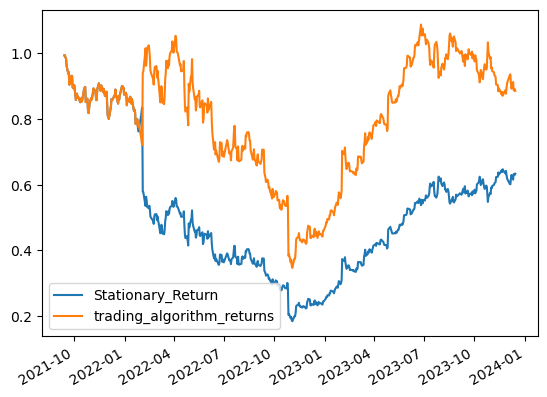

In [80]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["Stationary_Return", "trading_algorithm_returns"]]).cumprod().plot()

In [81]:
# Plot the actual returns versus the strategy returns

# Calculate cumulative product
predictions_df['Cumulative Actual Returns'] = (1 + predictions_df['Stationary_Return']).cumprod()
predictions_df['Cumulative Strategy Returns'] = (1 + predictions_df['trading_algorithm_returns']).cumprod()

# Plot using hvplot
plot_returns =predictions_df.hvplot.line(
    x='index',
    y=['Cumulative Actual Returns', 'Cumulative Strategy Returns'],
    title='Cumulative Returns Plot',
    xlabel='Date',
    ylabel='Cumulative Returns'
)

# Save the plot as a PNG file
plot_returns

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [82]:
ml_metrics = [
    'Annualized Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio'
]

# Create a list that holds the column name
columns = ['ML_Backtest']

# Initialize the DataFrame with index set to evaluation metrics and columns 
ml_portfolio_evaluation_df = pd.DataFrame(index=ml_metrics, columns=columns)

# Calculate the Annualized return metric
ml_portfolio_evaluation_df.loc['Annualized Return'] = (
    predictions_df['Stationary_Return'].mean() * 252
)

# Calculate the Annual volatility metric
ml_portfolio_evaluation_df.loc['Annual Volatility'] = (
    predictions_df['Stationary_Return'].std() * np.sqrt(252)
)
# Calculate the Sharpe ratio
ml_portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    predictions_df['Stationary_Return'].mean() * 252) / (
    predictions_df['Stationary_Return'].std() * np.sqrt(252)
)
# Calculate the Cumulative returns metric
ml_portfolio_evaluation_df.loc['Cumulative Returns'] = predictions_df['Cumulative Strategy Returns'][-1]
# Calculate the Sortino ratio
# Start by calculating the downside return values

# Create a DataFrame that contains the Portfolio Daily Returns column
sortino_ratio_df = predictions_df[['Stationary_Return']].copy()

# Create a column to hold downside return values
sortino_ratio_df.loc[:,'Downside Returns'] = 0

# Find Portfolio Daily Returns values less than 0, 
# square those values, and add them to the Downside Returns column
sortino_ratio_df.loc[sortino_ratio_df['Stationary_Return'] < 0, 
                     'Downside Returns'] = sortino_ratio_df['Stationary_Return']**2

# Calculate the annualized return value
annualized_return = sortino_ratio_df['Stationary_Return'].mean() * 252

# Calculate the annualized downside standard deviation value
downside_standard_deviation = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)

# Divide the annualized return value by the downside standard deviation value
sortino_ratio = annualized_return/downside_standard_deviation

# Add the Sortino ratio to the evaluation DataFrame
ml_portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
ml_portfolio_evaluation_df

,ML_Backtest
Annualized Return,-0.054302
Cumulative Returns,0.886417
Annual Volatility,0.528387
Sharpe Ratio,-0.10277
Sortino Ratio,-0.134665


In [83]:
portfolio_evaluation_df=pd.concat([portfolio_evaluation_df,ml_portfolio_evaluation_df],axis=1)
portfolio_evaluation_df

,SMA_Backtest,EMA_Backtest,SMMA_Backtest,VAMA_Backtest,ML_Backtest
Annualized Return,0.104472,0.104716,0.099751,0.099387,-0.054302
Cumulative Returns,2.0606,2.03245,1.81355,1.86685,0.886417
Annual Volatility,0.123694,0.131655,0.142876,0.128315,0.528387
Sharpe Ratio,0.8446,0.795385,0.698169,0.774549,-0.10277
Sortino Ratio,1.266392,1.166971,1.022957,1.162189,-0.134665


In [84]:
df_compare2=pd.concat([df_compare,predictions_df[['predicted_signal']].diff()], axis=1)
df_compare2.rename(columns={'predicted_signal': 'ML Positions'}, inplace=True)
correlation_matrix=df_compare2.corr()
pd.set_option('display.float_format', '{:.3f}'.format)
correlation_matrix

,Stationary_Return,SMA Positions,EMA Positions,SMMA Positions,VAMA Positions,ML Positions
Stationary_Return,1.000,-0.000,0.047,0.067,0.014,0.025
SMA Positions,-0.000,1.000,0.069,-0.000,0.334,-0.000
EMA Positions,0.047,0.069,1.000,0.027,0.033,-0.000
SMMA Positions,0.067,-0.000,0.027,1.000,-0.000,-0.000
VAMA Positions,0.014,0.334,0.033,-0.000,1.000,-0.000
ML Positions,0.025,-0.000,-0.000,-0.000,-0.000,1.000


<Axes: >

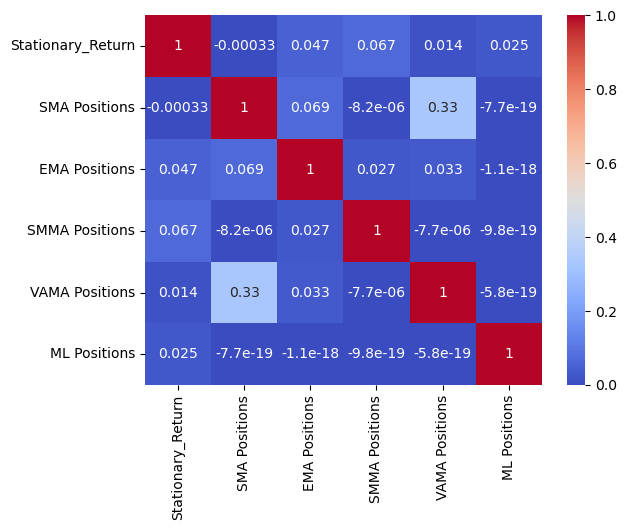

In [85]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Baseline Trading Algorithm

In [86]:
signals_df = df

In [87]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2012-10-09 00:00:00-04:00,20.390,20.550,19.970,20.230,27161800,0.000,0.000,-0.008,20.872,25.177,1.000,0.000,500.000,0.000,10115.000,87290.000,97405.000,-0.001,-0.026
2012-10-10 00:00:00-04:00,19.930,19.940,19.450,19.640,39321800,0.000,0.000,-0.029,20.295,24.991,1.000,0.000,500.000,0.000,9820.000,87290.000,97110.000,-0.003,-0.029
2012-10-11 00:00:00-04:00,19.880,19.960,19.610,19.750,21817300,0.000,0.000,0.006,20.005,24.848,1.000,0.000,500.000,0.000,9875.000,87290.000,97165.000,0.001,-0.028
2012-10-12 00:00:00-04:00,19.750,19.800,19.480,19.520,18809400,0.000,0.000,-0.012,19.785,24.733,1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,-0.001,-0.029
2012-10-15 00:00:00-04:00,19.680,19.880,19.490,19.520,20189700,0.000,0.000,0.000,19.608,24.608,1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,0.000,-0.029


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2023-12-11 00:00:00-05:00,329.400,329.890,320.000,325.280,25802500,0.000,0.000,-0.022,325.518,310.563,1.000,0.000,500.000,0.000,162639.999,138599.986,301239.985,-0.012,2.012
2023-12-12 00:00:00-05:00,324.600,334.470,324.560,334.220,18485500,0.000,0.000,0.027,329.710,310.963,1.000,0.000,500.000,0.000,167110.001,138599.986,305709.987,0.015,2.057
2023-12-13 00:00:00-05:00,333.930,338.370,332.640,334.740,16353300,0.000,0.000,0.002,331.747,311.394,1.000,0.000,500.000,0.000,167369.995,138599.986,305969.981,0.001,2.060
2023-12-14 00:00:00-05:00,333.850,334.700,328.640,333.170,19607300,0.000,0.000,-0.005,331.853,311.781,1.000,0.000,500.000,0.000,166585.007,138599.986,305184.993,-0.003,2.052
2023-12-15 00:00:00-05:00,331.990,338.660,331.220,334.920,30001600,0.000,0.000,0.005,334.263,312.144,1.000,0.000,500.000,0.000,167460.007,138599.986,306059.993,0.003,2.061


In [88]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_25892\4011502292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Signal'] = 0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2012-10-09 00:00:00-04:00,20.390,20.550,19.970,20.230,27161800,0.000,0.000,-0.008,20.872,25.177,-1.000,0.000,500.000,0.000,10115.000,87290.000,97405.000,-0.001,-0.026
2012-10-10 00:00:00-04:00,19.930,19.940,19.450,19.640,39321800,0.000,0.000,-0.029,20.295,24.991,-1.000,0.000,500.000,0.000,9820.000,87290.000,97110.000,-0.003,-0.029
2012-10-11 00:00:00-04:00,19.880,19.960,19.610,19.750,21817300,0.000,0.000,0.006,20.005,24.848,1.000,0.000,500.000,0.000,9875.000,87290.000,97165.000,0.001,-0.028
2012-10-12 00:00:00-04:00,19.750,19.800,19.480,19.520,18809400,0.000,0.000,-0.012,19.785,24.733,-1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,-0.001,-0.029
2012-10-15 00:00:00-04:00,19.680,19.880,19.490,19.520,20189700,0.000,0.000,0.000,19.608,24.608,1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,0.000,-0.029


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2023-12-11 00:00:00-05:00,329.400,329.890,320.000,325.280,25802500,0.000,0.000,-0.022,325.518,310.563,-1.000,0.000,500.000,0.000,162639.999,138599.986,301239.985,-0.012,2.012
2023-12-12 00:00:00-05:00,324.600,334.470,324.560,334.220,18485500,0.000,0.000,0.027,329.710,310.963,1.000,0.000,500.000,0.000,167110.001,138599.986,305709.987,0.015,2.057
2023-12-13 00:00:00-05:00,333.930,338.370,332.640,334.740,16353300,0.000,0.000,0.002,331.747,311.394,1.000,0.000,500.000,0.000,167369.995,138599.986,305969.981,0.001,2.060
2023-12-14 00:00:00-05:00,333.850,334.700,328.640,333.170,19607300,0.000,0.000,-0.005,331.853,311.781,-1.000,0.000,500.000,0.000,166585.007,138599.986,305184.993,-0.003,2.052
2023-12-15 00:00:00-05:00,331.990,338.660,331.220,334.920,30001600,0.000,0.000,0.005,334.263,312.144,1.000,0.000,500.000,0.000,167460.007,138599.986,306059.993,0.003,2.061


In [89]:
signals_df['Signal'].value_counts()

1.000     1488
-1.000    1327
Name: Signal, dtype: int64

In [90]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_25892\2718297389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Strategy Returns
2012-10-09 00:00:00-04:00,20.390,20.550,19.970,20.230,27161800,0.000,0.000,-0.008,20.872,25.177,-1.000,0.000,500.000,0.000,10115.000,87290.000,97405.000,-0.001,-0.026,NaN
2012-10-10 00:00:00-04:00,19.930,19.940,19.450,19.640,39321800,0.000,0.000,-0.029,20.295,24.991,-1.000,0.000,500.000,0.000,9820.000,87290.000,97110.000,-0.003,-0.029,0.029
2012-10-11 00:00:00-04:00,19.880,19.960,19.610,19.750,21817300,0.000,0.000,0.006,20.005,24.848,1.000,0.000,500.000,0.000,9875.000,87290.000,97165.000,0.001,-0.028,-0.006
2012-10-12 00:00:00-04:00,19.750,19.800,19.480,19.520,18809400,0.000,0.000,-0.012,19.785,24.733,-1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,-0.001,-0.029,-0.012
2012-10-15 00:00:00-04:00,19.680,19.880,19.490,19.520,20189700,0.000,0.000,0.000,19.608,24.608,1.000,0.000,500.000,0.000,9760.000,87290.000,97050.000,0.000,-0.029,-0.000


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Returns,SMA_Fast,SMA_Slow,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,Strategy Returns
2023-12-11 00:00:00-05:00,329.400,329.890,320.000,325.280,25802500,0.000,0.000,-0.022,325.518,310.563,-1.000,0.000,500.000,0.000,162639.999,138599.986,301239.985,-0.012,2.012,-0.022
2023-12-12 00:00:00-05:00,324.600,334.470,324.560,334.220,18485500,0.000,0.000,0.027,329.710,310.963,1.000,0.000,500.000,0.000,167110.001,138599.986,305709.987,0.015,2.057,-0.027
2023-12-13 00:00:00-05:00,333.930,338.370,332.640,334.740,16353300,0.000,0.000,0.002,331.747,311.394,1.000,0.000,500.000,0.000,167369.995,138599.986,305969.981,0.001,2.060,0.002
2023-12-14 00:00:00-05:00,333.850,334.700,328.640,333.170,19607300,0.000,0.000,-0.005,331.853,311.781,-1.000,0.000,500.000,0.000,166585.007,138599.986,305184.993,-0.003,2.052,-0.005
2023-12-15 00:00:00-05:00,331.990,338.660,331.220,334.920,30001600,0.000,0.000,0.005,334.263,312.144,1.000,0.000,500.000,0.000,167460.007,138599.986,306059.993,0.003,2.061,-0.005


<Axes: >

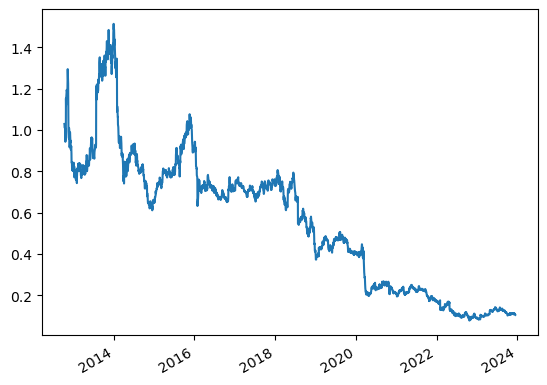

In [91]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

In [92]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
2012-10-10 00:00:00-04:00,20.872,25.177
2012-10-11 00:00:00-04:00,20.295,24.991
2012-10-12 00:00:00-04:00,20.005,24.848
2012-10-15 00:00:00-04:00,19.785,24.733
2012-10-16 00:00:00-04:00,19.608,24.608


In [93]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

1.000     1488
-1.000    1327
Name: Signal, dtype: int64

In [94]:
train_duration = 1000  # days
step_size = 24  # month

# Initialize lists to store training and testing dataframes
all_X_train = []
all_y_train = []
all_X_test = []
all_y_test = []

# Initialize the starting point for the training period
current_start = X.index.min() + DateOffset(years=6)

# Loop until the end of the dataset
while current_start + pd.DateOffset(days=train_duration) <= X.index.max():
    # Define the training end period
    training_end = current_start + pd.DateOffset(days=train_duration)

    # Generate the training data for the current window
    X_train = X.loc[current_start:training_end]
    y_train = y.loc[current_start:training_end]
    all_X_train.append(X_train)
    all_y_train.append(y_train)

    # Define the testing period as the next time step after the training end
    testing_end = training_end + pd.DateOffset(months=step_size)
    if testing_end > X.index.max():
        testing_end = X.index.max()

    # Generate the testing data for the current window
    X_test = X.loc[training_end:testing_end]
    y_test = y.loc[training_end:testing_end]
    all_X_test.append(X_test)
    all_y_test.append(y_test)

    # Update the start for the next iteration
    current_start = testing_end

# Concatenate all training and testing dataframes
final_X_train = pd.concat(all_X_train)
y_train = pd.concat(all_y_train)
final_X_test = pd.concat(all_X_test)
y_test = pd.concat(all_y_test)

In [95]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X_train data
X_scaler = scaler.fit(final_X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(final_X_train)
X_test_scaled = X_scaler.transform(final_X_test)

In [96]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()

# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.05      0.09       251
         1.0       0.50      0.93      0.65       253

    accuracy                           0.49       504
   macro avg       0.47      0.49      0.37       504
weighted avg       0.47      0.49      0.37       504



In [98]:
#Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index = final_X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
2021-07-06 00:00:00-04:00,1.000,-0.005,-0.005
2021-07-07 00:00:00-04:00,1.000,-0.006,-0.006
2021-07-08 00:00:00-04:00,1.000,-0.014,-0.014
2021-07-09 00:00:00-04:00,1.000,0.014,0.014
2021-07-12 00:00:00-04:00,1.000,0.008,0.008


,Predicted,Actual Returns,Strategy Returns
2023-06-29 00:00:00-04:00,-1.000,-0.013,0.013
2023-06-30 00:00:00-04:00,-1.000,0.019,-0.019
2023-07-03 00:00:00-04:00,-1.000,-0.003,0.003
2023-07-05 00:00:00-04:00,-1.000,0.029,-0.029
2023-07-06 00:00:00-04:00,-1.000,-0.008,0.008


<Axes: >

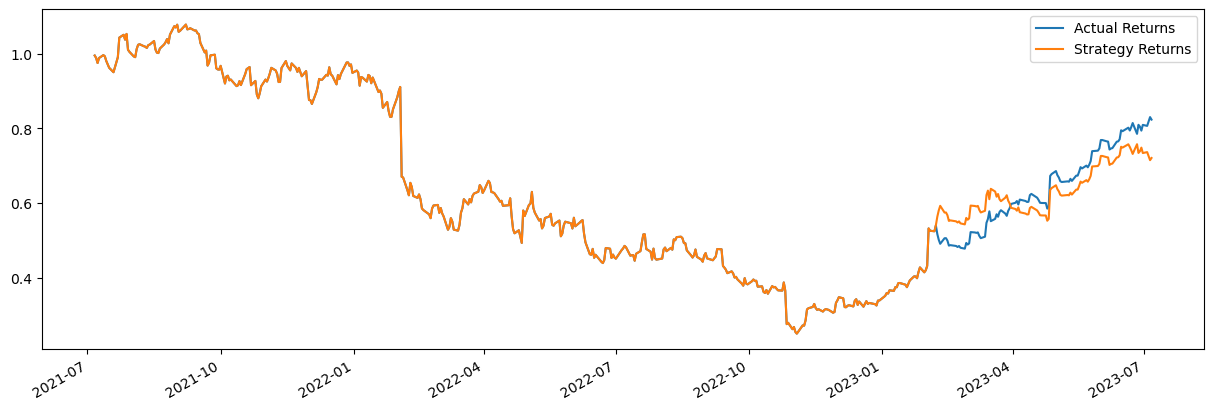

In [99]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))

# LogisticRegression

In [100]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

In [101]:
# Initiate the model instance
logistic_regression_model = LogisticRegression()

In [102]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [103]:
# Use a classification report to evaluate the model using the predictions and testing data
signal_predictions = classification_report(y_test, pred)

# Print the classification report
print(signal_predictions)

              precision    recall  f1-score   support

        -1.0       0.48      0.25      0.33       251
         1.0       0.50      0.74      0.59       253

    accuracy                           0.49       504
   macro avg       0.49      0.49      0.46       504
weighted avg       0.49      0.49      0.46       504



In [104]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
second_predictions_df = pd.DataFrame(index=final_X_test.index)

# Add the SVM model predictions to the DataFrame
second_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
second_predictions_df["Actual Returns"] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
second_predictions_df['Strategy Returns'] = second_predictions_df["Actual Returns"] * pred

# Review the DataFrame
second_predictions_df

,Predicted,Actual Returns,Strategy Returns
2021-07-06 00:00:00-04:00,-1.000,-0.005,0.005
2021-07-07 00:00:00-04:00,-1.000,-0.006,0.006
2021-07-08 00:00:00-04:00,-1.000,-0.014,0.014
2021-07-09 00:00:00-04:00,-1.000,0.014,-0.014
2021-07-12 00:00:00-04:00,-1.000,0.008,-0.008
...,...,...,...
2023-06-29 00:00:00-04:00,-1.000,-0.013,0.013
2023-06-30 00:00:00-04:00,-1.000,0.019,-0.019
2023-07-03 00:00:00-04:00,-1.000,-0.003,0.003
2023-07-05 00:00:00-04:00,-1.000,0.029,-0.029


In [105]:
print("Model Predictions (pred):")
print(pred)

print("Actual Returns:")
print(second_predictions_df["Actual Returns"])

print("Strategy Returns:")
print(second_predictions_df["Strategy Returns"])

Model Predictions (pred):
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. 

<Axes: >

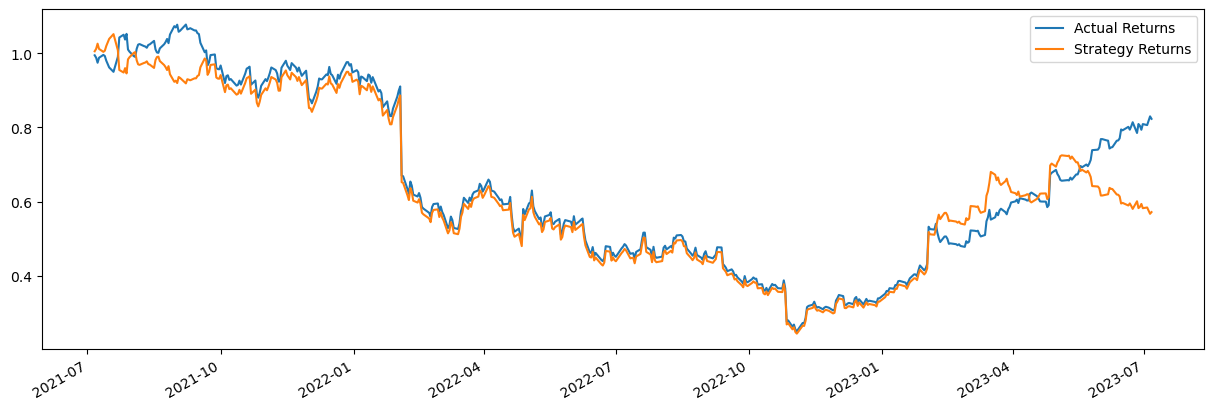

In [106]:
# Plot the actual returns versus the strategy returns
(1 + second_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot(figsize = (15,5))

# Multi-layer Perceptron (MLP) Algorithm

In [107]:
# Import a new classifier from SKLearn

# multi-layer perceptron (MLP) algorithm
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
clf = MLPClassifier(solver='sgd',
                    alpha=1e-5,
# max_iter=1000,
                    hidden_layer_sizes=(12, 8),
                    random_state=42
                    )

In [108]:
# Fit the model using the training data
MLP_model = clf.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
MLP_pred = MLP_model.predict(X_test_scaled)

# Review the model's predicted values
MLP_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [109]:
# Use a classification report to evaluate the model using the predictions and testing data
MLP_testing_report = classification_report(y_test, MLP_pred)

# Print the classification report
print(MLP_testing_report)

              precision    recall  f1-score   support

        -1.0       0.45      0.05      0.09       251
         1.0       0.50      0.94      0.65       253

    accuracy                           0.50       504
   macro avg       0.47      0.49      0.37       504
weighted avg       0.47      0.50      0.37       504



In [110]:
# Create a predictions DataFrame
MLP_predictions_df = pd.DataFrame(index = final_X_test.index)

# Add the model predictions to the DataFrame
MLP_predictions_df['Predicted'] = MLP_pred

# Add the actual returns to the DataFrame
MLP_predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
MLP_predictions_df['Strategy Returns'] = MLP_predictions_df['Actual Returns'] * MLP_predictions_df['Predicted']

# Review the DataFrame
display(MLP_predictions_df.head())
display(MLP_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
2021-07-06 00:00:00-04:00,1.000,-0.005,-0.005
2021-07-07 00:00:00-04:00,1.000,-0.006,-0.006
2021-07-08 00:00:00-04:00,1.000,-0.014,-0.014
2021-07-09 00:00:00-04:00,1.000,0.014,0.014
2021-07-12 00:00:00-04:00,1.000,0.008,0.008


,Predicted,Actual Returns,Strategy Returns
2023-06-29 00:00:00-04:00,1.000,-0.013,-0.013
2023-06-30 00:00:00-04:00,1.000,0.019,0.019
2023-07-03 00:00:00-04:00,1.000,-0.003,-0.003
2023-07-05 00:00:00-04:00,1.000,0.029,0.029
2023-07-06 00:00:00-04:00,1.000,-0.008,-0.008


<Axes: >

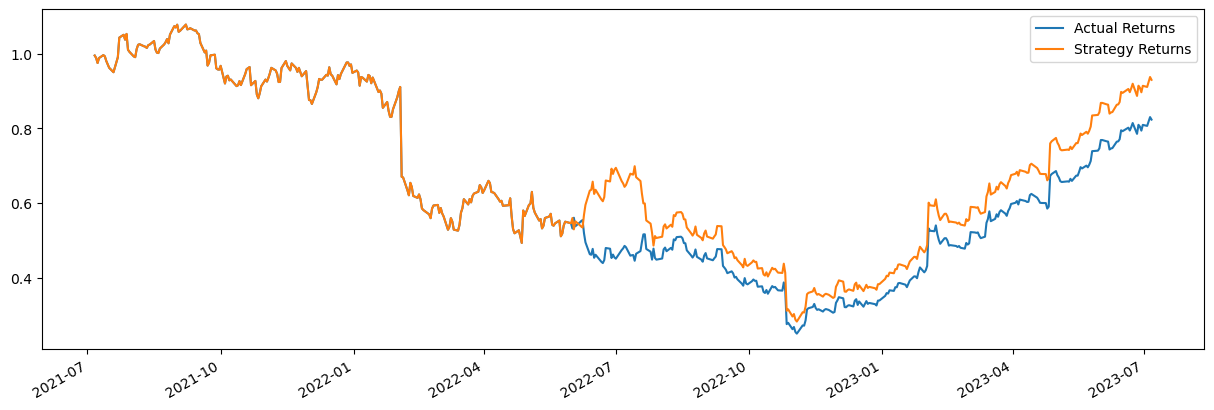

In [111]:
# Plot the actual returns versus the strategy returns
(1 + MLP_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))